In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://github.com/tidyverse/ggplot2/raw/master/data-raw/diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 10)

In [5]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [7]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [9]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [13]:
df['cut_num'] = np.where(df['cut'] == "Ideal" , 1 , 
                        np.where(df['cut'] == 'Fair',2,
                                np.where(df['cut'] == 'Good',3 ,
                                        np.where(df['cut'] == "Very Good",4,
                                                np.where(df['cut'] == "Premium",5,0)))))

In [20]:
df1 = pd.get_dummies(df , columns=['color','clarity'])

In [21]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df1 , test_size = 0.3)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lreg = LinearRegression()

In [22]:

help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, optional, default True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subt

In [33]:
lreg.fit(train.drop(columns = ['cut','price']) , train['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
pd.DataFrame(lreg.coef_ , index = df1.drop(columns = ['cut','price']).columns , columns=['coefficients']) 

,coefficients
carat,11215.333347
depth,-106.407547
table,-53.602753
x,-1074.107104
y,90.595473
z,-49.162381
cut_num,1.875038
color_D,821.956600
color_E,618.149737
color_F,542.975520


In [35]:
lreg.intercept_

10025.444636711261

In [37]:
lreg.score(test.drop(columns=['cut','price']) , test['price'])

0.9169519897640184

In [38]:
from sklearn.metrics import *

In [40]:
test_price = lreg.predict(test.drop(columns=['cut','price']))

In [44]:
##RMSE

In [43]:
mean_squared_error(test['price'] , test_price , squared = False)

1141.7456183800834

In [46]:
df1['price_class'] = df1['price'].apply(lambda x:1 if x>5324 else 0)

In [49]:
train['price_class'] = train['price'].apply(lambda x:1 if x>5324 else 0)
test['price_class'] = test['price'].apply(lambda x:1 if x>5324 else 0)

<ipython-input-49-4db51f3a2cd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['price_class'] = train['price'].apply(lambda x:1 if x>5324 else 0)
<ipython-input-49-4db51f3a2cd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['price_class'] = test['price'].apply(lambda x:1 if x>5324 else 0)


In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logreg = LogisticRegression()

In [53]:
logreg.fit(train.drop(columns= ['cut','price','price_class']) , train['price_class'])

/home/shreyas/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
test_pred_class = logreg.predict(test.drop(columns= ['cut','price','price_class']))

In [63]:
confusion_matrix(test['price_class'] , test_pred_class)

array([[11804,   278],
       [  321,  3779]])

In [77]:
pd.crosstab(test_pred_class,test['price_class'], colnames=['Actual'], rownames=['Predicted'], margins=True)

Actual,0,1,All
Predicted,,,
0,11804,321,12125
1,278,3779,4057
All,12082,4100,16182


In [68]:
accuracy_score(test['price_class'] , test_pred_class)*100

96.29835619824496

In [78]:
precision_score(test['price_class'],test_pred_class)

0.9314764604387479

In [80]:
recall_score(test['price_class'],test_pred_class)

0.9217073170731708

In [82]:
3779/4100

0.9217073170731708

In [91]:
test['arr_delay'] = logreg.predict_proba(test.drop(columns = ['cut','price','price_class']))[:,1]

<ipython-input-91-fca266f39b70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arr_delay'] = logreg.predict_proba(test.drop(columns = ['cut','price','price_class']))[:,1]


Text(0, 0.5, 'Density')

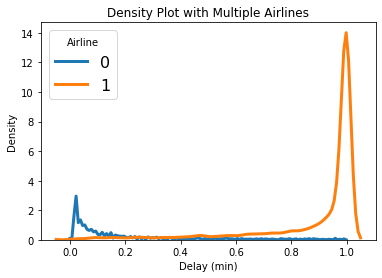

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
# List of five airlines to plot

airlines = [0,1]



# Iterate through the five airlines

for airline in airlines:

    # Subset to the airline

    subset = test[test['price_class'] == airline]

    

    # Draw the density plot

    sns.distplot(subset['arr_delay'], hist = False, kde = True,

                 kde_kws = {'linewidth': 3},

                 label = airline)

    

# Plot formatting

plt.legend(prop={'size': 16}, title = 'Airline')

plt.title('Density Plot with Multiple Airlines')

plt.xlabel('Delay (min)')

plt.ylabel('Density')

In [94]:
roc_auc_score(test['price_class'] , test['arr_delay'])

0.9938301484570878